In [1]:
from modules.OrderedClustering import OrderedClustering
from modules.DataPreprocessor import DataPreprocessor
from modules.ANNModel import ANNModel

In [2]:
import pandas as pd
from keras.callbacks import EarlyStopping

# **Flood Total Duration (Minutes)**

In [3]:
filename = 'dataset/KS_NV_VA_flood_oc.csv'
data = pd.read_csv(filename)
data

,State,County,Year,Month,Flood Occurrence Count,DSCI,None,D0,D1,D2,...,Planar Curvature Median,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90
0,NV,Clark County,2010,1,3,245,0.000000,0.509032,54.329677,45.16129,...,3.577034e+04,4.632772e+09,-2.580000e+11,2.520000e+11,5.100000e+11,1.716249e+08,5.102753e+09,4.650000e+15,8.305664e+06,4.402522e+09
1,VA,Alleghany County,2010,1,2,0,100.000000,0.000000,0.000000,0.00000,...,2.530091e+08,6.628369e+09,-5.450766e+10,4.489507e+10,9.940273e+10,2.374656e+08,5.885214e+09,3.670000e+14,0.000000e+00,6.597176e+09
2,VA,Amherst County,2010,1,4,0,100.000000,0.000000,0.000000,0.00000,...,3.114816e+08,4.359220e+09,-3.645808e+10,4.061929e+10,7.707737e+10,1.538470e+08,3.912765e+09,2.520000e+14,-2.143427e+08,4.722062e+09
3,VA,Bedford County,2010,1,2,0,100.000000,0.000000,0.000000,0.00000,...,2.437164e+08,3.564319e+09,-4.297026e+10,7.645101e+10,1.190000e+11,1.309690e+08,3.392697e+09,3.470000e+14,-1.896942e+08,4.075961e+09
4,VA,Campbell County,2010,1,3,0,100.000000,0.000000,0.000000,0.00000,...,1.786949e+08,2.362952e+09,-2.935548e+10,2.930944e+10,5.866493e+10,7.960300e+07,2.608435e+09,1.380000e+14,-1.701679e+08,2.847068e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,VA,Norfolk City,2022,10,0,19,90.322581,0.000000,9.677419,0.00000,...,0.000000e+00,6.188408e+08,-3.235518e+10,2.363699e+10,5.599217e+10,5.494413e+07,1.254633e+09,1.230000e+13,0.000000e+00,8.537212e+08
1650,VA,Amherst County,2022,11,0,29,74.358667,21.805333,3.836000,0.00000,...,3.114816e+08,4.359220e+09,-3.645808e+10,4.061929e+10,7.707737e+10,1.538470e+08,3.912765e+09,2.520000e+14,-2.143427e+08,4.722062e+09
1651,VA,Dickenson County,2022,12,0,13,86.620968,13.379032,0.000000,0.00000,...,2.075356e+08,1.178915e+10,-1.240000e+11,1.380000e+11,2.620000e+11,3.146877e+08,9.039835e+09,3.570000e+14,4.661046e+08,1.044179e+10
1652,VA,Prince William County,2022,12,0,38,62.001935,37.998065,0.000000,0.00000,...,6.039730e+06,2.481283e+09,-4.269882e+10,3.692513e+10,7.962395e+10,8.862024e+07,2.755162e+09,1.070000e+14,4.219818e+06,2.666575e+09


In [4]:
target_col = data['Flood Occurrence Count']
target_col_name = 'Flood Occurrence Count'
max_iter = 10
n_init = 100
n_classes = 7

In [5]:
ordered_clustering = OrderedClustering(target_col, max_iter, n_init)

In [6]:
cluster_results, inertia_results = ordered_clustering.clustering()

----------------------------------------
Number of Clusters: 1

Inertia: 7721.986094316814

Silhouette Score: 0 (Only one unique label)

Cluster Centers (sorted by ascending means):
Cluster 1: 1.4165659008464362

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20]

Number of Points in Clusters:
Cluster 1: 1654
----------------------------------------
Number of Clusters: 2

Inertia: 2960.551409511516

Silhouette Score: 0.8088564367789023

Cluster Centers (sorted by ascending means):
Cluster 1: 0.9748224661071676
Cluster 2: 7.933333333333335

Sorted and Relabeled Clusters (unique points):
Cluster 1: [0, 1, 2, 3, 4]
Cluster 2: [5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20]

Number of Points in Clusters:
Cluster 1: 1549
Cluster 2: 105
----------------------------------------
Number of Clusters: 3

Inertia: 1575.9668128307082

Silhouette Score: 0.728722393517706

Cluster Centers (sorted by ascending means):
Cluste

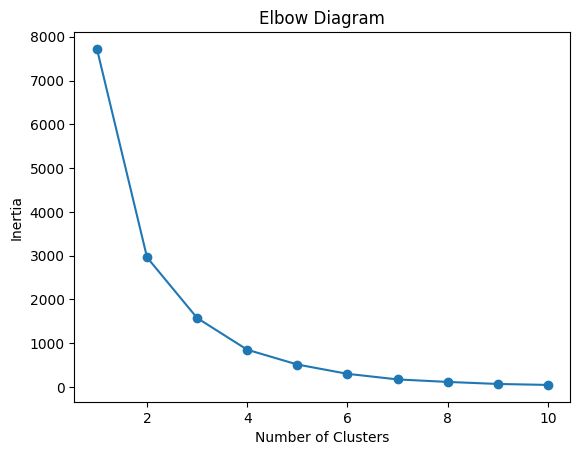

In [7]:
ordered_clustering.elbow_diagram(inertia_results)

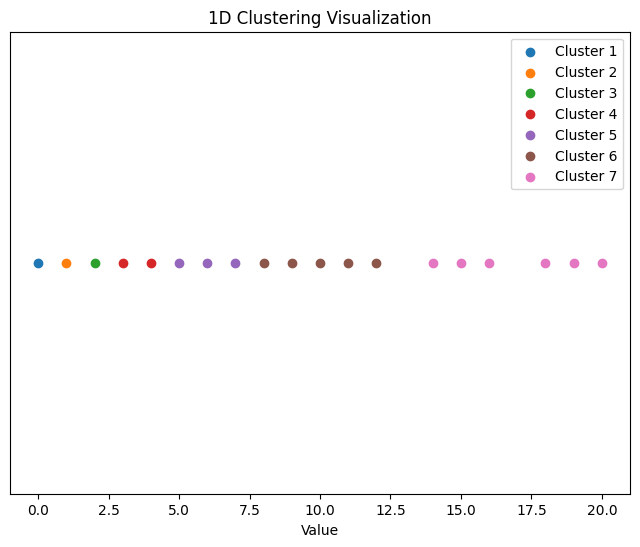

In [8]:
ordered_clustering.plot_clusters(cluster_results[n_classes - 1])

In [9]:
data[target_col_name + ' Relabeled'] = ordered_clustering.relabel(cluster_results[n_classes - 1])
data

,State,County,Year,Month,Flood Occurrence Count,DSCI,None,D0,D1,D2,...,Planar Curvature Pct90,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range,Profile Curvature Mean,Profile Curvature Std,Profile Curvature Sum,Profile Curvature Median,Profile Curvature Pct90,Flood Occurrence Count Relabeled
0,NV,Clark County,2010,1,3,245,0.000000,0.509032,54.329677,45.16129,...,4.632772e+09,-2.580000e+11,2.520000e+11,5.100000e+11,1.716249e+08,5.102753e+09,4.650000e+15,8.305664e+06,4.402522e+09,4
1,VA,Alleghany County,2010,1,2,0,100.000000,0.000000,0.000000,0.00000,...,6.628369e+09,-5.450766e+10,4.489507e+10,9.940273e+10,2.374656e+08,5.885214e+09,3.670000e+14,0.000000e+00,6.597176e+09,3
2,VA,Amherst County,2010,1,4,0,100.000000,0.000000,0.000000,0.00000,...,4.359220e+09,-3.645808e+10,4.061929e+10,7.707737e+10,1.538470e+08,3.912765e+09,2.520000e+14,-2.143427e+08,4.722062e+09,4
3,VA,Bedford County,2010,1,2,0,100.000000,0.000000,0.000000,0.00000,...,3.564319e+09,-4.297026e+10,7.645101e+10,1.190000e+11,1.309690e+08,3.392697e+09,3.470000e+14,-1.896942e+08,4.075961e+09,3
4,VA,Campbell County,2010,1,3,0,100.000000,0.000000,0.000000,0.00000,...,2.362952e+09,-2.935548e+10,2.930944e+10,5.866493e+10,7.960300e+07,2.608435e+09,1.380000e+14,-1.701679e+08,2.847068e+09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,VA,Norfolk City,2022,10,0,19,90.322581,0.000000,9.677419,0.00000,...,6.188408e+08,-3.235518e+10,2.363699e+10,5.599217e+10,5.494413e+07,1.254633e+09,1.230000e+13,0.000000e+00,8.537212e+08,1
1650,VA,Amherst County,2022,11,0,29,74.358667,21.805333,3.836000,0.00000,...,4.359220e+09,-3.645808e+10,4.061929e+10,7.707737e+10,1.538470e+08,3.912765e+09,2.520000e+14,-2.143427e+08,4.722062e+09,1
1651,VA,Dickenson County,2022,12,0,13,86.620968,13.379032,0.000000,0.00000,...,1.178915e+10,-1.240000e+11,1.380000e+11,2.620000e+11,3.146877e+08,9.039835e+09,3.570000e+14,4.661046e+08,1.044179e+10,1
1652,VA,Prince William County,2022,12,0,38,62.001935,37.998065,0.000000,0.00000,...,2.481283e+09,-4.269882e+10,3.692513e+10,7.962395e+10,8.862024e+07,2.755162e+09,1.070000e+14,4.219818e+06,2.666575e+09,1


In [10]:
for label, cluster in cluster_results[n_classes - 1]:
    print(f"Cluster {label}: {list(cluster)}")

Cluster 1: [0]
Cluster 2: [1]
Cluster 3: [2]
Cluster 4: [3, 4]
Cluster 5: [5, 6, 7]
Cluster 6: [8, 9, 10, 11, 12]
Cluster 7: [14, 15, 16, 18, 19, 20]


In [11]:
data_preprocessor = DataPreprocessor(cluster_results[n_classes - 1], data, target_col_name)

In [12]:
X, y = data_preprocessor.X_and_y()

In [13]:
X

,DSCI,None,D0,D1,D2,D3,D4,Population Density,Housing Unit Density,PCP Value,...,Flow Accumulation Median,Flow Accumulation Pct90,Curvature Min,Curvature Max,Curvature Range,Planar Curvature Max,Planar Curvature Range,Profile Curvature Min,Profile Curvature Max,Profile Curvature Range
0,245,0.000000,0.509032,54.329677,45.16129,0.0,0.0,24.620514,12.395314,2.74,...,2,114,-2.750000e+11,3.100000e+11,5.850000e+11,3.100000e+11,5.850000e+11,-2.580000e+11,2.520000e+11,5.100000e+11
1,0,100.000000,0.000000,0.000000,0.00000,0.0,0.0,13.940703,6.949272,3.72,...,2,32,-7.760903e+10,8.767071e+10,1.650000e+11,4.158475e+10,8.919515e+10,-5.450766e+10,4.489507e+10,9.940273e+10
2,0,100.000000,0.000000,0.000000,0.00000,0.0,0.0,26.113915,11.280257,5.55,...,1,28,-6.628814e+10,5.625434e+10,1.230000e+11,3.365284e+10,7.163512e+10,-3.645808e+10,4.061929e+10,7.707737e+10
3,0,100.000000,0.000000,0.000000,0.00000,0.0,0.0,37.661555,17.530052,5.21,...,1,29,-1.100000e+11,5.242824e+10,1.630000e+11,3.471498e+10,1.020000e+11,-4.297026e+10,7.645101e+10,1.190000e+11
4,0,100.000000,0.000000,0.000000,0.00000,0.0,0.0,41.782219,18.857973,4.49,...,1,28,-5.028033e+10,3.867537e+10,8.895570e+10,2.807619e+10,5.549922e+10,-2.935548e+10,2.930944e+10,5.866493e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,19,90.322581,0.000000,9.677419,0.00000,0.0,0.0,933.660589,390.623122,2.00,...,1,91,-3.564952e+10,6.210748e+10,9.775700e+10,3.548630e+10,5.519633e+10,-3.235518e+10,2.363699e+10,5.599217e+10
1650,29,74.358667,21.805333,3.836000,0.00000,0.0,0.0,25.470481,11.506829,6.47,...,1,28,-6.628814e+10,5.625434e+10,1.230000e+11,3.365284e+10,7.163512e+10,-3.645808e+10,4.061929e+10,7.707737e+10
1651,13,86.620968,13.379032,0.000000,0.00000,0.0,0.0,15.882108,8.726191,2.14,...,1,26,-2.210000e+11,2.160000e+11,4.370000e+11,1.240000e+11,2.150000e+11,-1.240000e+11,1.380000e+11,2.620000e+11
1652,38,62.001935,37.998065,0.000000,0.00000,0.0,0.0,539.531096,163.310915,4.44,...,1,34,-6.208320e+10,6.092991e+10,1.230000e+11,3.267561e+10,6.921118e+10,-4.269882e+10,3.692513e+10,7.962395e+10


In [14]:
y

0       4
1       3
2       4
3       3
4       4
       ..
1649    1
1650    1
1651    1
1652    1
1653    1
Name: Flood Occurrence Count Relabeled, Length: 1654, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = data_preprocessor.pipeline(X, y)

In [16]:
folder = 'ann_tuning_flood_oc'

early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor (e.g., validation loss)
    patience=100,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best-performing model
    )

In [17]:
ann_model = ANNModel(n_classes, X_train, X_test, y_train, y_test, folder, early_stopping)

INFO:tensorflow:Reloading Tuner from .\ann_tuning_flood_oc\tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\ann_tuning_flood_oc
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
num_layers: 3
units_0: 192
activation: relu
learning_rate: 0.01
units_1: 256
units_2: 352
units_3: 320
units_4: 64
Score: 0.4885311841964722

Trial 08 summary
Hyperparameters:
num_layers: 5
units_0: 480
activation: relu
learning_rate: 0.001
units_1: 256
units_2: 64
units_3: 160
units_4: 480
Score: 0.4820925533771515

Trial 07 summary
Hyperparameters:
num_layers: 4
units_0: 416
activation: relu
learning_rate: 0.01
units_1: 416
units_2: 256
units_3: 32
units_4: 512
Score: 0.48128772974014283

Trial 05 summary
Hyperparameters:
num_layers: 2
units_0: 320
activation: relu
learning_rate: 0.001
units_1: 352
units_2: 224
units_3: 64
units_4: 288
Score: 0.47766599655151365

Trial 09 summary
Hyperparameters:
num_layers: 2
units_0: 192
a

In [18]:
ann_model.train_and_predict()

Epoch 1/200
3/3 [==============================] - 1s 101ms/step - loss: 1.9903 - accuracy: 0.2544 - val_loss: 2.4522 - val_accuracy: 0.1167
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 1.6105 - accuracy: 0.3850 - val_loss: 1.5573 - val_accuracy: 0.4105
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 1.2029 - accuracy: 0.5639 - val_loss: 1.5791 - val_accuracy: 0.4165
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 0.9335 - accuracy: 0.6524 - val_loss: 1.8379 - val_accuracy: 0.3843
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.8112 - accuracy: 0.6912 - val_loss: 1.8099 - val_accuracy: 0.3883
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6640 - accuracy: 0.7639 - val_loss: 1.7649 - val_accuracy: 0.3964
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.5548 - accuracy: 0.7993 - val_loss: 1.7833 - val_accuracy: 0.4125
Epoch 8/200
3/3 [==

In [19]:
ann_model.evaluate()

16/16 [==============================] - 0s 2ms/step - loss: 7.2439 - accuracy: 0.4809
Test Loss: 7.243850231170654
Test Accuracy: 0.4808852970600128


In [20]:
ann_model.scores()

Accuracy: 0.48088531187122735
Precision: 0.27924829797562417
Recall: 0.2679555685783543
F1-Score: 0.2720412008840899


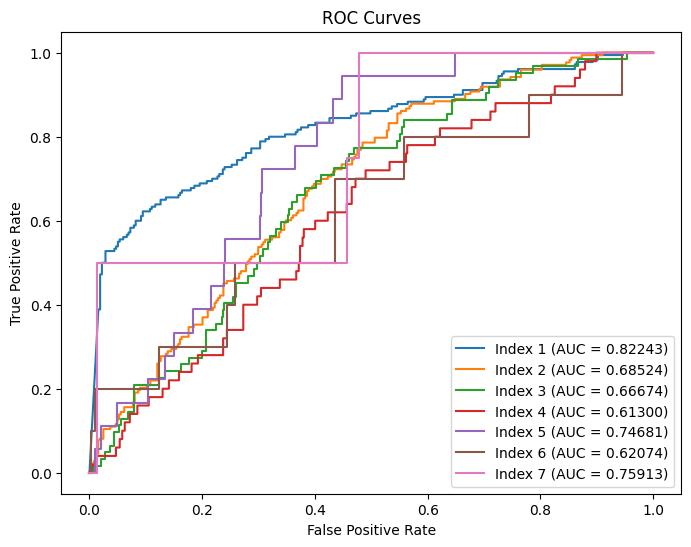

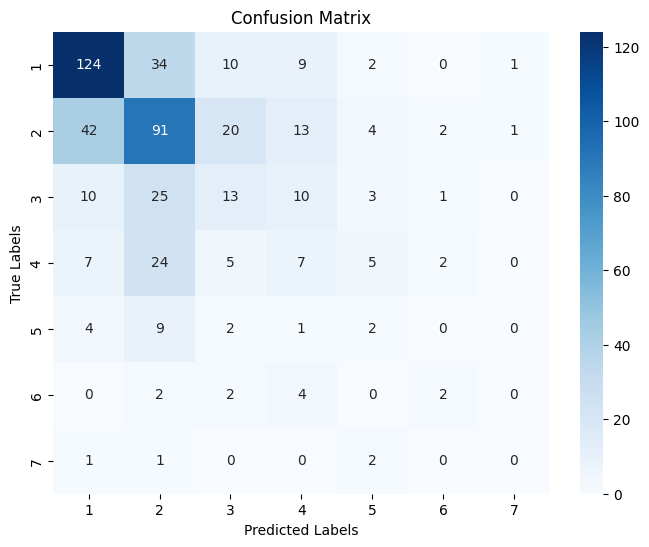

In [21]:
ann_model.figures()